In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **YouTube's Trending Videos**

The original data from [Kaggle](https://www.kaggle.com/datasets/pyuser11/youtube-trending-videos-updated-daily/data) features video data across several major categories like movies, music, and gaming featured on select YouTube Trending pages. For the sake of this analysis, I chose to focus on the trending videos from the main homepage (the `default` datasets), allowing for the whole gamut of chaos that one can find on YouTube and to better understand what _'trending on Youtube'_ looks like over the course of March 2025. The data provided is seperated by date, so one of the first things to do will involve joining all the seperate datasets together for our use.

## **Loading the Data** 

In [53]:
o= pd.read_csv('~/data/default_20250301.csv')
t=pd.read_csv('~/data/default_20250302.csv')
tr=pd.read_csv('~/data/default_20250303.csv')
f=pd.read_csv('~/data/default_20250304.csv')
fi=pd.read_csv('~/data/default_20250305.csv')
s=pd.read_csv('~/data/default_20250306.csv')
se=pd.read_csv('~/data/default_20250307.csv')
ei=pd.read_csv('~/data/default_20250308.csv')
n=pd.read_csv('~/data/default_20250309.csv')
ten=pd.read_csv('~/data/default_20250310.csv')
el=pd.read_csv('~/data/default_20250311.csv')
tw=pd.read_csv('~/data/default_20250312.csv')
tt=pd.read_csv('~/data/default_20250313.csv')
ft=pd.read_csv('~/data/default_20250314.csv')
fit=pd.read_csv('~/data/default_20250315.csv')
six=pd.read_csv('~/data/default_20250316.csv')
svt=pd.read_csv('~/data/default_20250317.csv')
eit=pd.read_csv('~/data/default_20250318.csv')
nit=pd.read_csv('~/data/default_20250319.csv')
twe=pd.read_csv('~/data/default_20250320.csv')
ton=pd.read_csv('~/data/default_20250321.csv')
twt=pd.read_csv('~/data/default_20250322.csv')
twtr=pd.read_csv('~/data/default_20250323.csv')
twf=pd.read_csv('~/data/default_20250324.csv')
twfi=pd.read_csv('~/data/default_20250325.csv')
twsi=pd.read_csv('~/data/default_20250326.csv')
twse=pd.read_csv('~/data/default_20250327.csv')
twei=pd.read_csv('~/data/default_20250328.csv')
twni=pd.read_csv('~/data/default_20250329.csv')
thir=pd.read_csv('~/data/default_20250330.csv')
thiro=pd.read_csv('~/data/default_20250331.csv')

thir.head(5)

,title,description,videoId,thumbnails,channelName,channelId,channelUrl,verified,publishedText,publishedDate,viewsText,views,videoUrl,duration,durationText,isShort
0,REACTING TO FAN EDITS AGAIN,God Bless the Quenaissance \n\nUse my code for...,uOMyMt1cz80,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",Quenlin Blackwell,UCRE2zmVNW9wG2dndMoV4JKQ,https://www.youtube.com/@QUENBLACKWELL,True,22 hours ago,2025-03-29T22:00:08.341Z,"675,348 views",675348,https://www.youtube.com/watch?v=uOMyMt1cz80,1956,32:36,False
1,My Biggest Hyperfixation Yet.,this tiny thing is consuming my entire life......,vp_dzqZXgMg,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",JaidenAnimations,UCGwu0nbY2wSkW8N-cghnLpA,https://www.youtube.com/@jaidenanimations,True,1 day ago,2025-03-29T20:00:08.341Z,"2,384,589 views",2384589,https://www.youtube.com/watch?v=vp_dzqZXgMg,797,13:17,False
2,Squid Game In Real Life: Beta Squad Edition,We take on Squid Game In Real Life! Last Perso...,52iBKzh3oWU,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",Beta Squad,UCxOzbkk0bdVl6-tH1Fcajfg,https://www.youtube.com/@BetaSquad,True,1 day ago,2025-03-29T20:00:08.341Z,"3,185,712 views",3185712,https://www.youtube.com/watch?v=52iBKzh3oWU,3821,1:03:41,False
3,I HOSTED AAU BASKETBALL TRYOUTS IN BALTIMORE!,OUR FIRST TOURNAMENT IS THIS WEEKEND! YALL KNO...,Ij1-7dMoC18,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",Cam Wilder,UCkNB_lQah9MLniBLlk97iBw,https://www.youtube.com/@CamWilder,True,1 day ago,2025-03-29T20:00:08.341Z,"481,794 views",481794,https://www.youtube.com/watch?v=Ij1-7dMoC18,2373,39:33,False
4,Duke vs. Alabama - Elite Eight NCAA tournament...,Watch the highlights from No. 1 Duke and No. 2...,MuS_YNeYoQ0,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",March Madness,UCKjEtnnXEHsXE9IvCb92V7g,https://www.youtube.com/@MarchMadness,False,16 hours ago,2025-03-30T04:00:08.341Z,"746,956 views",746956,https://www.youtube.com/watch?v=MuS_YNeYoQ0,623,10:23,False


### Based on the data explanation (also provided via kaggle), we have the following columns:

|Column Name | Description|
|-|-|
|`title`| The title of the video.|
|`description`| The video's description|
|`publishedDate`| The date and time when the video was published (in a machine-readable format)|
|`publishedText`| The date and time when the video was published (in a human-readable format)|
|`videoId`| The unique identifier for the video|
|`videoUrl`| The URL of the video|
|`channelName`| The name of the channel that published the video.|
|`channelId`| The unique identifier for the channel.|
|`channelUrl`| The URL of the channel.|
|`thumbnails`| URLs for the video's thumbnail images in different resolutions.|
|`views`| The number of views the video has received.|
|`viewsText`| The number of views in a human-readable format (e.g., "1.2M views").|
|`duration`| The duration of the video (in a machine-readable format).|
|`durationText`| The duration of the video in a human-readable format (e.g., "3:24").|
|`verified`| A boolean indicating whether the channel is verified or not.|
|`isShort`| A boolean indicating whether the video is a YouTube Shorts video or not.|

## **Cleaning & Joining Data:** 
Before concatenating the individual datasets together, I am going to add date columns so we can keep track of when certain videos were on the homepage. While there is a `publishedDate` column in the data, it does not remain consistent among all entries for a distinct video so we will choose to ignore it.

In [54]:
o['Date']='2025-03-01'
t['Date']='2025-03-02'
tr['Date']='2025-03-03'
f['Date']='2025-03-04'
fi['Date']='2025-03-05'
s['Date']='2025-03-06'
se['Date']='2025-03-07'
ei['Date']='2025-03-08'
n['Date']='2025-03-09'
ten['Date']='2025-03-10'
el['Date']='2025-03-11'
tw['Date']='2025-03-12'
tt['Date']='2025-03-13'
ft['Date']='2025-03-14'
fit['Date']='2025-03-15'
six['Date']='2025-03-16'
svt['Date']='2025-03-17'
eit['Date']='2025-03-18'
nit['Date']='2025-03-19'
twe['Date']='2025-03-20'
ton['Date']='2025-03-21'
twt['Date']='2025-03-22'
twtr['Date']='2025-03-23'
twf['Date']='2025-03-24'
twfi['Date']='2025-03-25'
twsi['Date']='2025-03-26'
twse['Date']='2025-03-27'
twei['Date']='2025-03-28'
twni['Date']='2025-03-29'
thir['Date']='2025-03-30'
thiro['Date']='2025-03-31'

In [55]:
df=pd.concat([o,t,tr,f,fi,s,se,ei,n,ten,el,tw,tt,ft,fit,six,svt,eit,nit,twe,ton,twt,twtr,twf,twfi,twsi,twse,twei,twni,thir,thiro]).reset_index(drop=True)
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          3120 non-null   object        
 1   description    3016 non-null   object        
 2   videoId        3120 non-null   object        
 3   thumbnails     3120 non-null   object        
 4   channelName    3120 non-null   object        
 5   channelId      3120 non-null   object        
 6   channelUrl     3120 non-null   object        
 7   verified       3120 non-null   bool          
 8   publishedText  3120 non-null   object        
 9   publishedDate  3120 non-null   object        
 10  viewsText      3032 non-null   object        
 11  views          3120 non-null   int64         
 12  videoUrl       3120 non-null   object        
 13  duration       3120 non-null   int64         
 14  durationText   3120 non-null   object        
 15  isShort        3120 n

As we can see from the above, there are some columns that contain nulls (i.e. `description` and `viewsText`). We could fill or get rid of any nulls, but, those columns will not be of use for our focus, so we will disregard them for now. 

## **What does it mean to trend?** The Who & What and Are they being influenced by Viewer Engagement?

While there are many questions to have about the who, what, where, how, and why of the videos being featured on the YouTube homepage, given the data we have available, I am choosing to focus on the Who & What is being featured on the homepage to determine what YouTube means when they say 'trending' and whether this is affected by viewer engagement. More specifically, I will address the following:

**1. Who's videos are being featured on the homepage in March 2025?**
- What portion of videos featured on the homepage come from verified creators?
- Who, of those featured on the homepage, is verified and not verified? Is there a pattern?
- Who are the most featured creators during this period?

**2. What is being featured on the homepage and why is it there?**
- Does each day have different trending videos?
- What videos frequented the homepage the most?
- What criteria gets a video on the homepage?
    - Is it the views?
    - What about the views of when a video is first featured on the homepage?
- What criteria keeps a video on the homepage? What dictates that a video's tenure must end?

### <ins> 1. Who's videos are being featured on the homepage?:</ins> 
#### <span style="color: blue;">_What portion of videos featured on the homepage come from verified creators?_</span>

One of the biggest advantages of YouTube in today's media landscape, is how, in comparison to traditional media distributors like Warner Brothers Discovery & NBC Universal, YouTube does not have to take on the role of content creator and invest in 'unproven' content. It relies on independent creators to create content to be streamed on the platform. It is only when said content / creator proves to be popular that YouTube starts to invest and approve monetization of specified content. In this way, YouTube stays ahead of traditional media corporations that often stick to continuations of known commercial successes (to reduce risk in a weak ad market and continue to be 'competitive' in this age of streaming) and has risen to [become the most viewed among all media distributors](https://www.nielsen.com/news-center/2025/youtube-achieves-best-monthly-performance-to-date-and-pulls-ahead-in-nielsens-february-media-distributor-gauge/)

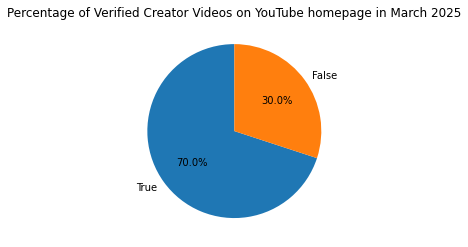

In [56]:
v= df['verified'].value_counts()
plt.pie(v, labels=v.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Verified Creator Videos on YouTube homepage in March 2025')
plt.show()

As a majority of the videos come from verified users (verification, being a key step in being able to monetize content via YouTube's Partnership Program), this could be the result of YouTube picking their YPP participants well or it could be the result of YouTube setting a specific ratio for verified/unverified creators being featured on the homepage.  

When zooming in to look at specific days, like March 14, 2025 below, the ratio is pretty close to a 70/30 split between verified and unverified channels being featured on the homepage. This further supports that there may be a set ratio for what kind of creators get featured, favoring verified creators.

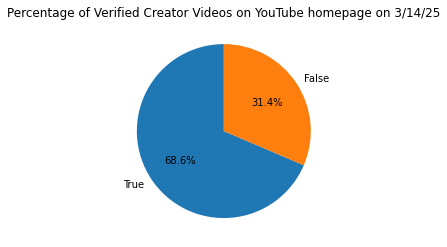

In [57]:
u= df.loc[df['Date']=='2025-03-14']['verified'].value_counts()
plt.pie(u, labels=u.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Verified Creator Videos on YouTube homepage on 3/14/25')
plt.show()

#### <span style="color: blue;">_Who, of those featured on the homepage in March 2025, is verified and not verified? Is there a pattern?_</span>

As we looked at the fraction of verified/ unverified creators are featured on the homepage, we must also ask what kinds of creators make up these groups.

In [58]:
list(df.loc[df["verified"] == True]['channelName'].unique())

['C-SPAN',
 'Universal Pictures',
 'Drew Gooden',
 'JaidenAnimations',
 'Jesser',
 "Louie's Life",
 'Jake Webber',
 'Warner Bros.',
 'LLOUD Official',
 'Royal Court',
 'The Official Pokémon YouTube channel',
 'Clash of Clans',
 'FRANCE 24 English',
 'Hay Day',
 'NPR Music',
 'Mythri Movie Makers',
 'Inside Edition',
 'Firelight',
 'Xiaomanyc 小马在纽约',
 'This Esme',
 'colinfurze',
 'Grian',
 'Schaffrillas Productions',
 'Austin John Plays',
 'NRL - National Rugby League',
 'Will Tennyson',
 'Eli Mack',
 'Daniel Krafft',
 'Marques Brownlee',
 'DazzReviews',
 'NFL',
 'ESPN FC',
 'Star Wars',
 'Brawl Stars',
 'Dude Perfect',
 '60 Minutes',
 'Quenlin Blackwell',
 'Airrack',
 'Sam and Colby',
 'CBS Sports Golazo',
 'House Committee on the Judiciary',
 'Cutie The Bunny',
 'Kurzgesagt – In a Nutshell',
 'MrBeast',
 'Evbo',
 'Drew Dirksen',
 'videogamedunkey',
 'TD BRICKS',
 'Alexa Rivera',
 'elliot',
 'Premier Boxing Champions',
 'WWE',
 'Sports On Prime',
 'Fight Hub TV',
 'Ice Cream Sandwich',

In [59]:
list(df.loc[df["verified"] == False]['channelName'].unique())

['Fridayy',
 'YoungBoy Never Broke Again',
 'Future',
 'Tito Double P',
 'G Herbo',
 'Lizzo Music',
 'Jombriel',
 '2 Danny 2 Furious',
 'Benson Boone',
 'SB19 Official',
 'Malcolm Todd',
 'ADÉLA',
 'The Beeston Bunch',
 'The Beeston Fam',
 'Karan Aujla',
 'Ze Frank',
 'Mat Armstrong MK2',
 'J. Cole',
 'JENNIE',
 'Jorjiana ',
 'OfficialGDRAGON',
 'Riley Green',
 'Alex Warren',
 'H O T B O I I',
 'Sabrina Carpenter',
 'Dany Ome & Kevincito El 13 ',
 'JADE',
 'Mr. Bricks',
 'BossMan Dlow',
 'LARRAY',
 'Hudson Westbrook',
 'Skote Outdoors',
 'Kipper',
 'Reality Daydream',
 'RØZ - Topic',
 'Yailin La Mas Viral',
 'LUCKI',
 'Tyla',
 'Ghost',
 'Doechii',
 'Cleetus2 McFarland',
 'GELO',
 "Tony Hawk's Pro Skater",
 'Don Toliver',
 'Brian Weissman',
 'Itzmegab3',
 'Jayco',
 'kevingatesTV',
 'Dolly Parton',
 'CBS Sports Golazo - Europe',
 'Beéle',
 'Fredo Bang',
 'Lady Gaga',
 'Hanumankind',
 'TEC',
 'The Young and Restless',
 "Dave's DRH Acrylic Creations",
 'Benjy Chavez ',
 'KOJIMA PRODUCTIONS

What surprises me the most about these lists is how many popular musical artists are not verified (i.e Lizzo Music, Benson Boone, JENNIE, Sabrina Carpenter). As YouTube is a major avenue for artists to gain exposure and reach out to new audiences (at no expense to the audience), it is a good opportunity to monetize said following. 

Otherwise, the list of verified channels includes corporate accounts (i.e CSPAN, Warner Bros., Saturday Night Live) and known content creators as expected.

#### <span style="color: blue;">_Who are the most featured creators in March 2025? Are they verified?_</span>

In comparison to previous analysis, 80% of the top featured creators in March 2025 are not verified. This of course leaves the answer to whether verified users are favored in being posted to the homepage as inconclusive.

Text(0, 0.5, 'Channel')

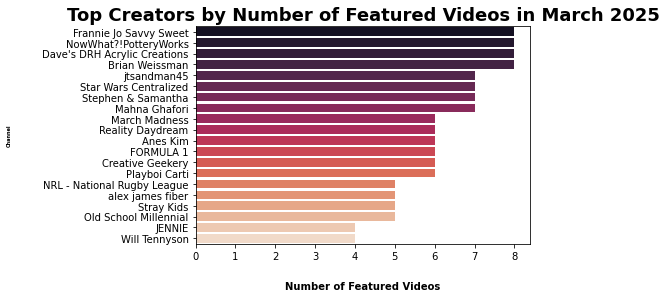

In [60]:
x= df[['videoId','channelName']].drop_duplicates()
xx=x['channelName'].value_counts().head(20).reset_index()
xx.columns = ['Channel','Number of Featured Videos']

fig = sns.barplot(x='Number of Featured Videos', y='Channel',data=xx,palette='rocket',hue='Channel')

fig.set_title('Top Creators by Number of Featured Videos in March 2025',fontsize=18, weight ='semibold')
fig.set_xlabel('Number of Featured Videos',fontsize=10, labelpad=20,weight='semibold')
fig.set_ylabel('Channel',fontsize=5, labelpad=30, weight='semibold')

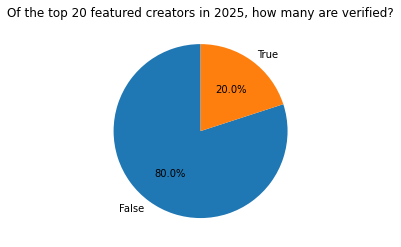

In [61]:
ll=df[['channelName','verified']].drop_duplicates()
xx.rename(columns={'Channel':'channelName'},inplace=True)
h=xx.merge(ll,on='channelName')
l=h['verified'].value_counts()

plt.pie(l, labels=l.index, autopct='%1.1f%%', startangle=90)
plt.title('Of the top 20 featured creators in 2025, how many are verified?')
plt.show()


### <ins> 2. What is being featured on the homepage?

#### <span style="color: blue;">_Does each day have different trending videos?_</span>
While unlikely, given the autocorrelative nature of 'trending videos' over the course of a month (trending generally depends on engagement metrics like views and views today depend on the views yesterday as they compound), there is a possbility that YouTube may try to highlight different videos on its homepage each day. 

In the concatenated dataset, we have 3120 entries but we find that there are only 896 unique video IDs over the course of March, which tells us that a lot of the videos that appeared on the homepage in March 2025, appeared multiple times during the course of the month.

In [62]:
df['videoId'].nunique()

896

#### <span style="color: blue;">_What videos frequented the homepage the most?_</span>

Within the top 20 most frequently featured videos, we find that a majority (7/20) are music videos from recognizable artists like Doechii and Selena Gomez (that are not verified channels) and the remainder come from verified content creators. 

Text(0, 0.5, 'Video')

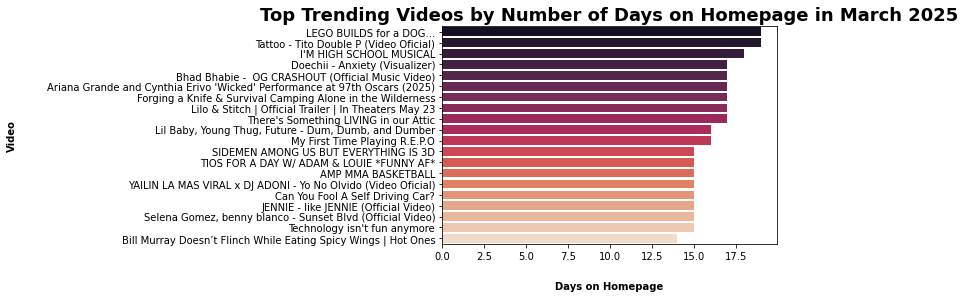

In [63]:
trend_video = df['title'].value_counts().head(20).reset_index()
trend_video.columns = ['Video', 'count']


fig = sns.barplot(x='count', y='Video',data=trend_video,palette='rocket',hue='Video')

fig.set_title('Top Trending Videos by Number of Days on Homepage in March 2025',fontsize=18, weight ='semibold')
fig.set_xlabel('Days on Homepage',fontsize=10, labelpad=20,weight='semibold')
fig.set_ylabel('Video',fontsize=10, labelpad=30, weight='semibold')

In [64]:
#verification status of channels producing top 20 most featured videos
df.loc[df['title'].isin(trend_video['Video']),['channelName','verified']].drop_duplicates().reset_index(drop=True)

,channelName,verified
0,Drew Gooden,True
1,Tito Double P,False
2,Oscars,True
3,The Royalty Family,True
4,Danny Gonzalez,True
5,Yailin La Mas Viral,False
6,Doechii,False
7,JENNIE,False
8,First We Feast,True
9,Outdoor Boys,True


However, when we look a little further to get an understanding of when the most frequently featured video may have been on the homepage, we find that on some days, some videos are being featured multiple times.

For example, the _LEGO BUILDS for a DOG_ video (#1/20) appeared in the data twice on 2025-03-15 & 2025-03-16, 1-2 days since first being published / posted. To check whether this an error in the data or if it is possible that the video was featured on the homepage multiple times on the same date, we will check some of the other videos in the top 20 most featured list.

In [65]:
df.loc[df["title"] == "LEGO BUILDS for a DOG...",['Date','publishedText','views']].sort_values("Date")

,Date,publishedText,views
1418,2025-03-15,1 day ago,844154
1499,2025-03-15,1 day ago,844154
1532,2025-03-16,2 days ago,1089926
1586,2025-03-16,2 days ago,1089926
1682,2025-03-17,3 days ago,1291516
1787,2025-03-18,4 days ago,1513068
1888,2025-03-19,5 days ago,1735704
1990,2025-03-20,6 days ago,2176936
2073,2025-03-21,7 days ago,3463132
2168,2025-03-22,8 days ago,4914994


Doechii's _Anxiety (Visualizer)_ (#4/20) was also featured twice on the homepage on 3/6/25 & 3/7/25 1-2 days after posting.

In [66]:
df.loc[df["title"] == "Doechii - Anxiety (Visualizer)",['Date','publishedText','views']].sort_values("Date")

,Date,publishedText,views
400,2025-03-05,19 hours ago,792669
506,2025-03-06,1 day ago,1812498
569,2025-03-06,1 day ago,1812498
632,2025-03-07,2 days ago,2880540
661,2025-03-07,2 days ago,2880540
768,2025-03-08,3 days ago,4146989
863,2025-03-09,4 days ago,5518143
956,2025-03-10,5 days ago,6877583
1058,2025-03-11,6 days ago,8187504
1155,2025-03-12,7 days ago,9462501


The data from Doechii's _Anxiety (Visualizer)_ and the _LEGO BUILDS for a DOG_ video suggest that there might be a pattern where a video can become double featured if published recently (1-2 days) and gain more than 500,000 views in that time. The data from Jennie's _like JENNIE_ music video (#17/20) does not seem to completely support this hypothesis, as the double postings occur within the 15 hours to 1 day since posting time frame but it also does not seem to refute that the views need to grow larger than 500,000 within the first 24-48 hours of being posted.

In [67]:
df.loc[df["title"] == "JENNIE - like JENNIE (Official Video)",['Date','publishedText','views']].sort_values("Date")

,Date,publishedText,views
597,2025-03-07,15 hours ago,6610705
662,2025-03-07,15 hours ago,6610705
707,2025-03-08,1 day ago,11713923
760,2025-03-08,1 day ago,11713923
823,2025-03-09,2 days ago,15672156
947,2025-03-10,3 days ago,18930718
1056,2025-03-11,4 days ago,21618420
1153,2025-03-12,5 days ago,24145751
1260,2025-03-13,6 days ago,26437773
1359,2025-03-14,7 days ago,28804251


This will of course need to be investigated further in `What criteria gets a video on the homepage?`

#### <span style="color: blue;">_But what criteria gets a video on the homepage?_</span>

Given the data we have available, I hypothesize that the view count is used to help determine placing on the homepage. As `views` is one of the few engagement metrics we have access to via this dataset and part of what we would normally expect to be used to define 'trending', this will be a good start to understand Youtube's logic to placing a video on the homepage.

**_Is it actually the views?_** Comparing the most viewed videos (of those featured on the March 2025 homepage) and the most featured videos

I am going to start by taking a look at the max view count videos achieved while on the homepage. As the view counts are compounded daily, the maximum is generally the last day of a video's tenure on the homepage.

In [68]:
#find the max views of video
df_max_index = df.groupby('videoId')['views'].idxmax()
x= df.loc[df_max_index].sort_values(by='views',ascending=False).head(20).reset_index(drop=True)

x.head()

,title,description,videoId,thumbnails,channelName,channelId,channelUrl,verified,publishedText,publishedDate,viewsText,views,videoUrl,duration,durationText,isShort,Date
0,I Spent 100 Hours Inside The Pyramids!,I can’t believe we were allowed to do this\nSe...,NDsO1LT_0lw,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,https://www.youtube.com/@MrBeast,True,3 weeks ago,2025-02-09T20:00:07.888Z,"149,378,597 views",149378597,https://www.youtube.com/watch?v=NDsO1LT_0lw,1303,21:43,False,2025-03-02
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,Watch hip-hop’s MVP put on an epic performance...,KDorKy-13ak,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",NFL,UCDVYQ4Zhbm3S2dlz7P1GBDg,https://www.youtube.com/@NFL,True,3 weeks ago,2025-02-13T20:00:07.297Z,"97,236,538 views",97236538,https://www.youtube.com/watch?v=KDorKy-13ak,801,13:21,False,2025-03-06
2,100 People Trapped Inside 100 Circles For $500...,Seeing these past contestants battle it out fo...,zajUgQLviwk,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,https://www.youtube.com/@MrBeast,True,3 days ago,2025-03-01T20:00:07.949Z,"48,807,682 views",48807682,https://www.youtube.com/watch?v=zajUgQLviwk,2318,38:38,False,2025-03-04
3,I Survived The 5 Deadliest Places On Earth,It’s crazy we actually did this\nOur new Feast...,aKq8bkY5eTU,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,https://www.youtube.com/@MrBeast,True,2 days ago,2025-03-22T20:00:07.242Z,"43,335,403 views",43335403,https://www.youtube.com/watch?v=aKq8bkY5eTU,828,13:48,False,2025-03-24
4,JENNIE - like JENNIE (Official Video),Official music video for “like JENNIE” from th...,JSFG-IE8n_c,"[{'quality': 'maxres', 'url': 'https://i.ytimg...",JENNIE,UCNYi_zGmR519r5gYdOKLTjQ,https://www.youtube.com/channel/UCNYi_zGmR519r...,False,12 days ago,2025-03-07T20:00:06.978Z,"38,130,949 views",38130949,https://www.youtube.com/watch?v=JSFG-IE8n_c,183,3:03,False,2025-03-19


Text(0, 0.5, 'Video')

/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 54604 (\N{HANGUL SYLLABLE PIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


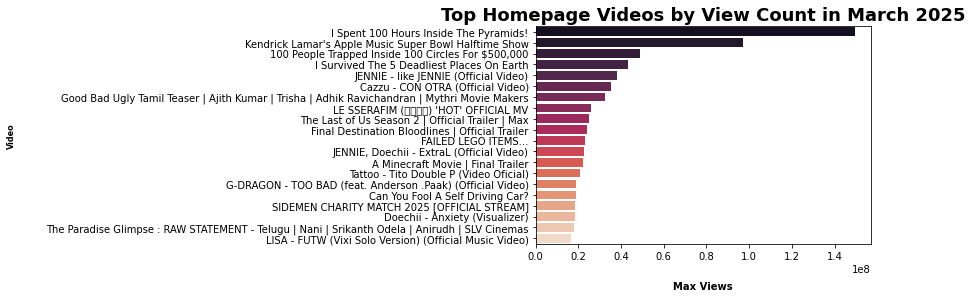

In [69]:
fig = sns.barplot(x='views', y='title',data=x,palette='rocket',hue='title')

fig.set_title('Top Homepage Videos by View Count in March 2025',fontsize=18, weight ='semibold')
fig.set_xlabel('Max Views',fontsize=10, labelpad=20,weight='semibold')
fig.set_ylabel('Video',fontsize=8, labelpad=30, weight='semibold')

#there may be some warnings about inability to produce foreign characters, specifically Hangul

The top 20 most featured videos versus the top 20 most viewed among those featured in March 2025 share some commonalities (like, JENNIE - _like JENNIE_, Doechii - _Anxiety (Visualizer)_) but are pretty different on the whole. Doechii's _Anxiety (Visualizer)_ is ranked fourth in most featured video but is ranked 18th with 18,166,710 views in top 20 most viewed ranking.

The most notable difference between the two rankings is how many more foreign language videos are included in the top 20 most viewed when compared to the top 20 most featured. As shown below (the **featured ranking** being the first 3 columns and the **viewing ranking** being the last 3 columns), we find that 7/20 in most viewed come from foreign creators and only 3/20 in the most featured ranking come from foreign creators.

In [70]:
s=trend_video.rename(columns={'Video':'title'})
#df_max_index = df.groupby('videoId')['views'].idxmax()
y=df.loc[df_max_index]
h=y[['title','views']].reset_index(drop=True)
p= s.merge(h,on='title').reset_index()
p.rename(columns={'title':'MOST FEATURED - title'},inplace=True)



viewed=x[['title','views']].reset_index()
f=df['title'].value_counts().reset_index()
f.columns = ['title', 'count']
j=viewed.merge(f,on='title').reset_index(drop=True)
j.rename(columns={'title':'MOST VIEWED - title'},inplace=True)


p.merge(j, on='index').drop(['index'], axis=1)


,MOST FEATURED - title,count_x,views_x,MOST VIEWED - title,views_y,count_y
0,LEGO BUILDS for a DOG...,19,12461146,I Spent 100 Hours Inside The Pyramids!,149378597,2
1,Tattoo - Tito Double P (Video Oficial),19,20983434,Kendrick Lamar's Apple Music Super Bowl Halfti...,97236538,6
2,I'M HIGH SCHOOL MUSICAL,18,4796973,100 People Trapped Inside 100 Circles For $500...,48807682,3
3,Doechii - Anxiety (Visualizer),17,18318116,I Survived The 5 Deadliest Places On Earth,43335403,4
4,Bhad Bhabie - OG CRASHOUT (Official Music Video),17,9314801,JENNIE - like JENNIE (Official Video),38130949,15
5,Ariana Grande and Cynthia Erivo 'Wicked' Perfo...,17,4291522,Cazzu - CON OTRA (Official Video),35110699,12
6,Forging a Knife & Survival Camping Alone in th...,17,10724886,Good Bad Ugly Tamil Teaser | Ajith Kumar | Tri...,32276743,1
7,Lilo & Stitch | Official Trailer | In Theaters...,17,11965512,LE SSERAFIM (르세라핌) 'HOT' OFFICIAL MV,25711196,9
8,There's Something LIVING in our Attic,17,8313046,The Last of Us Season 2 | Official Trailer | Max,24809958,12
9,"Lil Baby, Young Thug, Future - Dum, Dumb, and ...",16,5953063,Final Destination Bloodlines | Official Trailer,23813631,7


**_But what about the views of when a video may first be featured on the homepage?_**

Within the further investigation of `What videos frequented the homepage the most?`, there was a possible pattern that could result in a video being posted to the homepage multiple times a day: views must grow larger than 500,000 within the first 24-48 hours of being posted. While it may be difficult to prove that conclusion, we can check if there is a minimum view count needed to be posted to the homepage (the minimum number of views implying that a video was only recently posted and had not previously been on the homepage.)

Unfortunately, we can confirm that you can in fact have 0 views and still get featured on the homepage.

In [71]:
df_min_index = df.groupby('videoId')['views'].idxmin()
z=df.loc[df_min_index]
z=z[['title','views']].reset_index(drop=True)
z.rename(columns={'views':'min_views'},inplace=True)
z.sort_values(by='min_views',ascending=True).head()

,title,min_views
562,What is the Green Jedi Order?,0
626,Severance Real Filming Locations! #severance #...,0
623,"before and after, Kiln load #NowWhatPotteryWor...",0
796,Fix Your Pesky Back Foot Disc Golf Throw,0
799,This Welder is a Great Value #welder #arccaptain,0


That, along with the rather varied view count of when the most popular videos (most featured  & most viewed) first begin to be featured on the homepage in March 2025 (some videos on the most viewed ranking look like they may have been featured previously (i.e. February 2025) like _Kendrick Lamar_), further support the conclusion that there are many other things to consider when determining what videos to feature on the homepage. Clearly, we need more information than what can be inferred by the provided data.

In [72]:
u=pd.merge(p['MOST FEATURED - title'],z,left_on='MOST FEATURED - title',right_on='title').drop(['title'],axis=1).reset_index()
v=pd.merge(j['MOST VIEWED - title'],z,left_on='MOST VIEWED - title',right_on='title').drop(['title'],axis=1).reset_index()
u.merge(v,on='index').drop(['index'],axis=1)

,MOST FEATURED - title,min_views_x,MOST VIEWED - title,min_views_y
0,LEGO BUILDS for a DOG...,844154,I Spent 100 Hours Inside The Pyramids!,147378599
1,Tattoo - Tito Double P (Video Oficial),1609151,Kendrick Lamar's Apple Music Super Bowl Halfti...,91940033
2,I'M HIGH SCHOOL MUSICAL,1828467,I Survived The 5 Deadliest Places On Earth,33698346
3,Doechii - Anxiety (Visualizer),792669,JENNIE - like JENNIE (Official Video),6610705
4,Bhad Bhabie - OG CRASHOUT (Official Music Video),2299259,Cazzu - CON OTRA (Official Video),3186526
5,Ariana Grande and Cynthia Erivo 'Wicked' Perfo...,1757257,Good Bad Ugly Tamil Teaser | Ajith Kumar | Tri...,32276743
6,Forging a Knife & Survival Camping Alone in th...,940711,LE SSERAFIM (르세라핌) 'HOT' OFFICIAL MV,8431871
7,Lilo & Stitch | Official Trailer | In Theaters...,5926520,The Last of Us Season 2 | Official Trailer | Max,7454824
8,There's Something LIVING in our Attic,3514550,Final Destination Bloodlines | Official Trailer,7788839
9,"Lil Baby, Young Thug, Future - Dum, Dumb, and ...",1093266,FAILED LEGO ITEMS...,23081650


#### <span style="color: blue;"> _What criteria keeps a video on the homepage? What causes a video's tenure on the homepage to end?_</span>

It is unlikely that view count is used to determine a video's placement on the homepage based on previous analysis. But from earlier work that determined that there are videos that have been on the homepage multiple times during March 2025 (`Does each day have different videos?`), maybe it is used to determine how long (`What videos frequented the homepage the most?`) a video continues to be on the homepage.

To do this, I look at the percent change in views for days on the homepage. I hypothesize that when the view growth (while on the homepage) starts to plateau, a video gets pulled from the homepage. This, begs the question, what is that plateau?

In [73]:
def percent_change(df,group,target,func,new_name):
    o= df.groupby(group)[target].transform(func)
    o=o.fillna(0)
    df[new_name]= o
    return df

func = lambda x: (x-x.shift(1))/x.shift(1)*100.0
df_change = percent_change(df,'videoId','views',func,'percent_change')
x=df_change[['Date','title','percent_change']].drop_duplicates(subset=['Date','title']) #eliminate double postings & sudden drops in change in views
p=["Tattoo - Tito Double P (Video Oficial)","A Minecraft Movie | Final Trailer","JENNIE - like JENNIE (Official Video)","I'M HIGH SCHOOL MUSICAL","Doechii - Anxiety (Visualizer)","Final Destination Bloodlines | Official Trailer","G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video)","SIDEMEN CHARITY MATCH 2025 [OFFICIAL STREAM]","AMP MMA BASKETBALL","Can You Fool A Self Driving Car?","Technology isn't fun anymore","I'M HIGH SCHOOL MUSICAL","AMP MMA BASKETBALL","LISA - FUTW (Vixi Solo Version) (Official Music Video)","I Survived The 5 Deadliest Places On Earth","Bill Murray Doesn’t Flinch While Eating Spicy Wings | Hot Ones"]
x=x[x['title'].isin(p)]
x

,Date,title,percent_change
2,2025-03-01,Technology isn't fun anymore,0.000000
8,2025-03-01,A Minecraft Movie | Final Trailer,0.000000
9,2025-03-01,LISA - FUTW (Vixi Solo Version) (Official Musi...,0.000000
16,2025-03-01,Tattoo - Tito Double P (Video Oficial),0.000000
69,2025-03-01,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,0.000000
...,...,...,...
2802,2025-03-28,Can You Fool A Self Driving Car?,0.687650
2877,2025-03-29,Final Destination Bloodlines | Official Trailer,21.468457
2914,2025-03-29,Can You Fool A Self Driving Car?,0.829374
2974,2025-03-30,Final Destination Bloodlines | Official Trailer,16.769388


As quite a few of the videos in this dataset are only featured once and will not have any significant change in view count during their tenure, I focused my visualization on a sample of the videos on the top 20 most featured and top 20 most viewed lists.

Through this, we find that some videos like _I Survived the Five Deadliest Places on Earth_ get pulled from the homepage while in the middle of viewership growth and others like the _Final Destination: Bloodline_ trailer seem to continue their tenure on the homepage into April 2025 (but look like they may follow the same pattern of rest of the videos), most of the videos percent change in viewership seem to follow a [Weibull Distribution](https://byjus.com/maths/weibull-distribution/) where viewership growth hits a peak within the first couple days of being on the homepage but eventually growth slows and plateaus to almost 0, marking the end of its tenure on the homepage.

Unfortunately, this Weibull density may also be the result of viewership growth after a video gets published as this is common behavior to see of any content viewership performance. So, while this is a promising start to what affects a video's tenure on the homepage, we definitely need more information about all YouTube videos (featured & not featured) and other engagement metrics before concluding anything.

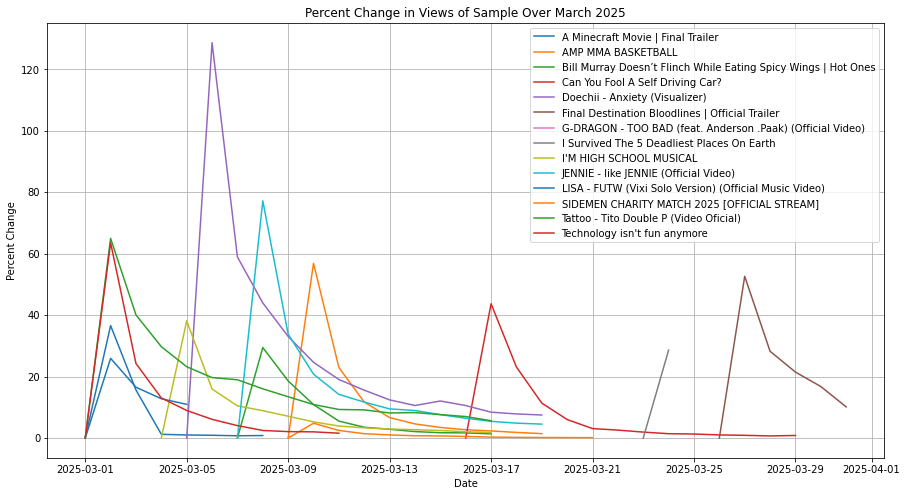

In [74]:
fig, ax = plt.subplots(figsize=(15, 8))
x=x.groupby('title')
# Plot each group as a separate line
palette=sns.color_palette("cubehelix", as_cmap=True)
for key, group in x:
    ax.plot(group['Date'], group['percent_change'], label=key)

# Set axis labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Percent Change')
ax.set_title('Percent Change in Views of Sample Over March 2025')

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

# Conclusion

Through this analysis, I was able to look into the who and what of videos being featured on the YouTube homepage in March 2025. We found that a majority of videos being featured come from verified channels and that viewership engagement is unlikely to have any significant influence over being featured on the homepage. However, there is some evidence that we should continue looking into other engagement metrics to see if any sort of engagement metric influences a video's tenure on the homepage or if there is more to the story (like [Google's (YouTube's parent company) search monopoly that has the potential to control what ads and websites consumers see](https://apnews.com/article/google-illegal-monopoly-advertising-search-a1e4446c4870903ed05c03a2a03b581e) ) of how to get featured on the homepage as suggested by YouTube's favorable treatment of verified creators.

While I was hoping the results would not be quite so inconclusive, it is very clear that the data chosen provides a very limited view of the videos deemed to be 'trending' and featured on the homepage, both in range of time and in metrics provided. There are still many measurable factors that we do not have access to that could provide more thorough answers to the questions we have posed. So as of now, what YouTube actually means when they call a video 'trending' is inconclusive.
